First you need to install qartezator from project root directory

In [57]:
!pip install ../

Processing /home/andranik/YSU/Python/Project/qartezator
  Preparing metadata (setup.py) ... done
  Created wheel for qartezator: filename=qartezator-0.0.1-py3-none-any.whl size=3432 sha256=63b305461270af2a3f81578061bab23f2f891cc5bc7978eb44c2a365d21510e1
  Stored in directory: /tmp/pip-ephem-wheel-cache-f0r7hatn/wheels/ba/50/f7/f4ee8756509b193b1afefa83058409fe03c5151b43513131f3
Successfully built qartezator
  Attempting uninstall: qartezator
    Found existing installation: qartezator 0.0.1
    Uninstalling qartezator-0.0.1:
      Successfully uninstalled qartezator-0.0.1


In [58]:
import torch
from PIL import Image

from qartezator.data.dataset import QartezatorDataset
from qartezator.data.datamodule import QartezatorDataModule
from qartezator.data.transforms import get_common_augmentations

In [59]:
root_path = '../data/maps'
train_txt_path = '../assets/train.txt'
val_txt_path = '../assets/val.txt'
test_txt_path = '../assets/test.txt'

In [60]:
ds = QartezatorDataset(
    root_path=root_path,
    split_file_path=train_txt_path,
    common_transform=get_common_augmentations(256)
)
sample_source_img, sample_target_img = ds[42]

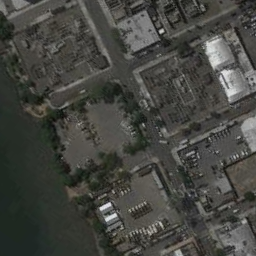

In [61]:
Image.fromarray(sample_source_img)

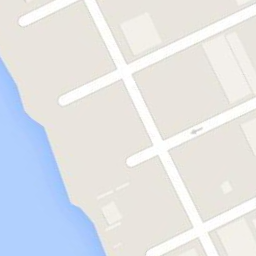

In [62]:
Image.fromarray(sample_target_img)

In [63]:
dm = QartezatorDataModule(
    root_path=root_path,
    train_txt_path=train_txt_path,
    val_txt_path=val_txt_path,
    test_txt_path=test_txt_path,
    input_size=256
)
train_dataloader = dm.train_dataloader()  # dm.val_dataloader(), dm.test_dataloader(),
for batch in train_dataloader:
    source, target = batch
    print(f'Source batch shape: {source.shape}')
    print(f'Target batch shape: {target.shape}\n')
    break

Source batch shape: torch.Size([32, 3, 256, 256])
Target batch shape: torch.Size([32, 3, 256, 256])

